In [7]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # True if GPU + CUDA is available

2.7.1+cu118
True


In [8]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [9]:
urls = search_images('bird photos', max_images = 1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

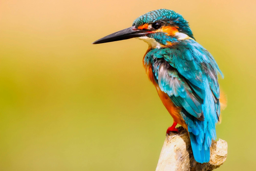

In [10]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [11]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")

Torch version: 2.7.1+cu118
CUDA available: True
GPU name: NVIDIA GeForce RTX 4070 Laptop GPU


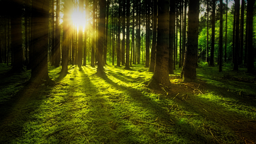

In [12]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [14]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [13]:
searches = 'alligator', 'crocodile'
path = Path('alligator_or_crocodile')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [42]:
searches = 'cat', 'dog'
path = Path('cat_or_dog')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [36]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

21

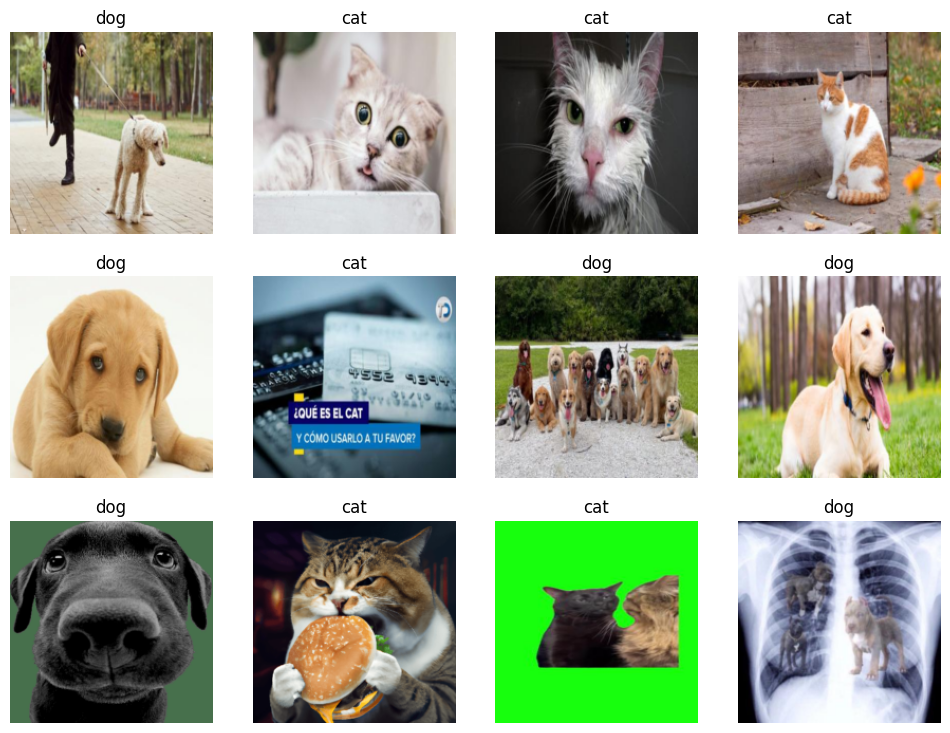

In [44]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed= 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [46]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time


UnidentifiedImageError: cannot identify image file 'C:\\Users\\huang\\Documents\\GitHub\\learning-deep\\fast.ai\\cat_or_dog\\dog\\ef30d283-f735-4ed6-b263-1a965437bd31.jpg'

In [48]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a : {probs[0]:.4f}")

This is a: dog.
Probability it's a : 0.3159
